#### Author: Rudransh Jaiswal


# K Means Clustering

### Given an initial set of k centroids (c[0],c[1],...,c[k-1]) the algorithm proceeds by alternating between these two steps:


#### 1. Assignment Step: Assign each data point (obseravtion) to the cluster corresponding to closest centroid:
 
$\begin{align}S_{i}^{(t)}\end{align}$
is cluster correspoding to centroid c[i] at iteration t

$\begin{equation*}
S_{i_{o}}^{(t)}={\big \{}x_{p}:i_{o}=argmin_{i}{\big \|}x_{p}-c_{i}^{(t)}{\big \|}^{2}; 0\leq i\leq k-1{\big \}}
\end{equation*}$

We assign an observation $\begin{align}x\end{align}$ to cluster$\begin{align}S_{i_{o}}^{(t)}\end{align}$ where $\begin{align}i_{o}=argmin_{i}{\big \|}x-c_{i}^{(t)}{\big \|}^{2}\end{align}$. 

In simple terms c[$\begin{align}i_{o}\end{align}$] is the closest centroid to the obsevation $\begin{align}x\end{align}$

#### 2. Update Step: Recalculate centroids for observations assigned to each cluster:

$
\begin{equation*}
{\displaystyle c_{i}^{(t+1)}={\frac {1}{\left|S_{i}^{(t)}\right|}}\sum _{x_{j}\in S_{i}^{(t)}}x_{j}}
\end{equation*}
$

We recalculate the mean (centroid) of the clusters obtained after the Assignment Step

#### The algorithm converges when the assignments no longer change. In practice we iterate until the change is within a specified tolerance.

In [1]:

import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# k = no of clusters
# each data point is of dimension n
# for m data points shape of X is (m,n)
# shape of centroids is (k,n)

def assignCluster(X,k,centroids):
    m=len(X)
    cluster_ids=[0]*m # array denoting cluster id of each data point
    for i in range(m):
        distances=[0]*k
        for j in range(k): #find distance of x with each centroid
            distances[j]=np.linalg.norm(X[i]-centroids[j])
        cluster_ids[i]=np.argmin(distances) #assign cluster id corresponding to closest centroid
    return cluster_ids

def getCentroids(X,k,cluster_ids):
    n=len(X[0])
    # use dataframe groupby function to get centroids as follows
    df=pd.DataFrame(X)
    df['cluster_ids']=cluster_ids
    df=df.groupby(['cluster_ids']).mean()
    centroids=np.array(df.values)
    #Shape of centroids centroids.shape = (k,n)
    return centroids

def kMeans(X,k,centroids,tol):
    cluster_ids=assignCluster(X,k,centroids) # assign clusters for the initial centroids
    curr_tol=math.inf
    n_iter=0
    while curr_tol >= tol: # stopping criteria
        curr_centroids=centroids # store the values of previous centroids
        centroids=getCentroids(X,k,cluster_ids) # recalculate centroids of the clusters
        cluster_ids=assignCluster(X,k,centroids) # assign clusters to observations
        curr_tol=np.max(abs(curr_centroids-centroids)) #
        n_iter+=1
    return cluster_ids


# Lets Run it

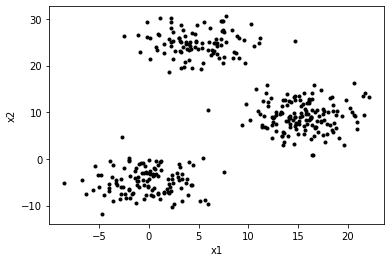

In [3]:
# Generate random data
X1=np.random.multivariate_normal([0,-5], [[8,0.5],[0.5,9]], 120)
X2=np.random.multivariate_normal([15,9], [[8,0.5],[0.5,9]], 150)
X3=np.random.multivariate_normal([5,25], [[8,0.5],[0.5,9]], 100)
X=np.append(X1,np.append(X2,X3,axis=0),axis=0)
plt.scatter(X[:,0],X[:,1],marker='.',c='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [4]:
# initialise centroids and run for k=3
k=3
tol=1e-3
centroids=np.array([[10,30],[25,-5],[-5,10]])
cluster_ids_k3=kMeans(X,k,centroids,tol)

# initialise centroids and run for k=4
k=4
tol=1e-3
centroids=np.array([[10,30],[25,-5],[0,0],[4,3]])
cluster_ids_k4=kMeans(X,k,centroids,tol)

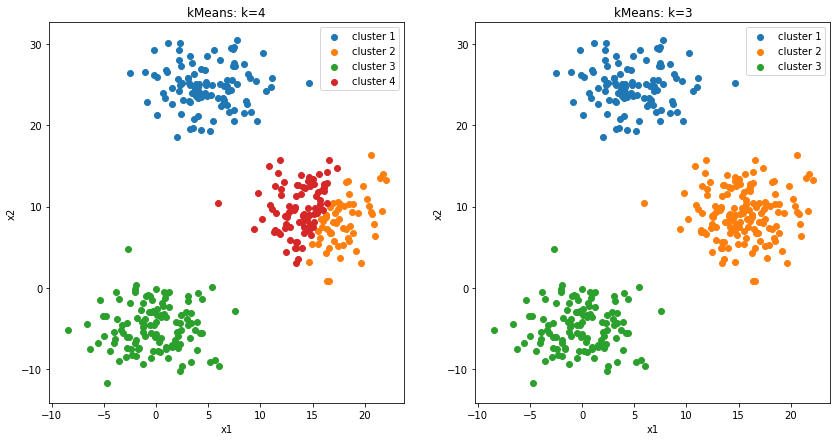

In [5]:
# Visualise the scatter plot of the clusters
def plotIt(X,cluster_ids,k,ax):
    arr=[[] for i in range(k)]
    for i in range(len(X)):
        arr[cluster_ids[i]].append(X[i])
    for i in range(k):
        ar1=np.array(arr[i])
        ax.scatter(ar1[:,0],ar1[:,1],label='cluster '+str(i+1))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('kMeans: k='+str(k))
    ax.legend(loc=1)
    
fig,axes=plt.subplots(figsize=(14,7),ncols=2)
plotIt(X,cluster_ids_k3,3,axes[1])
plotIt(X,cluster_ids_k4,4,axes[0])